### Importing necessary libraries and displaying the original image

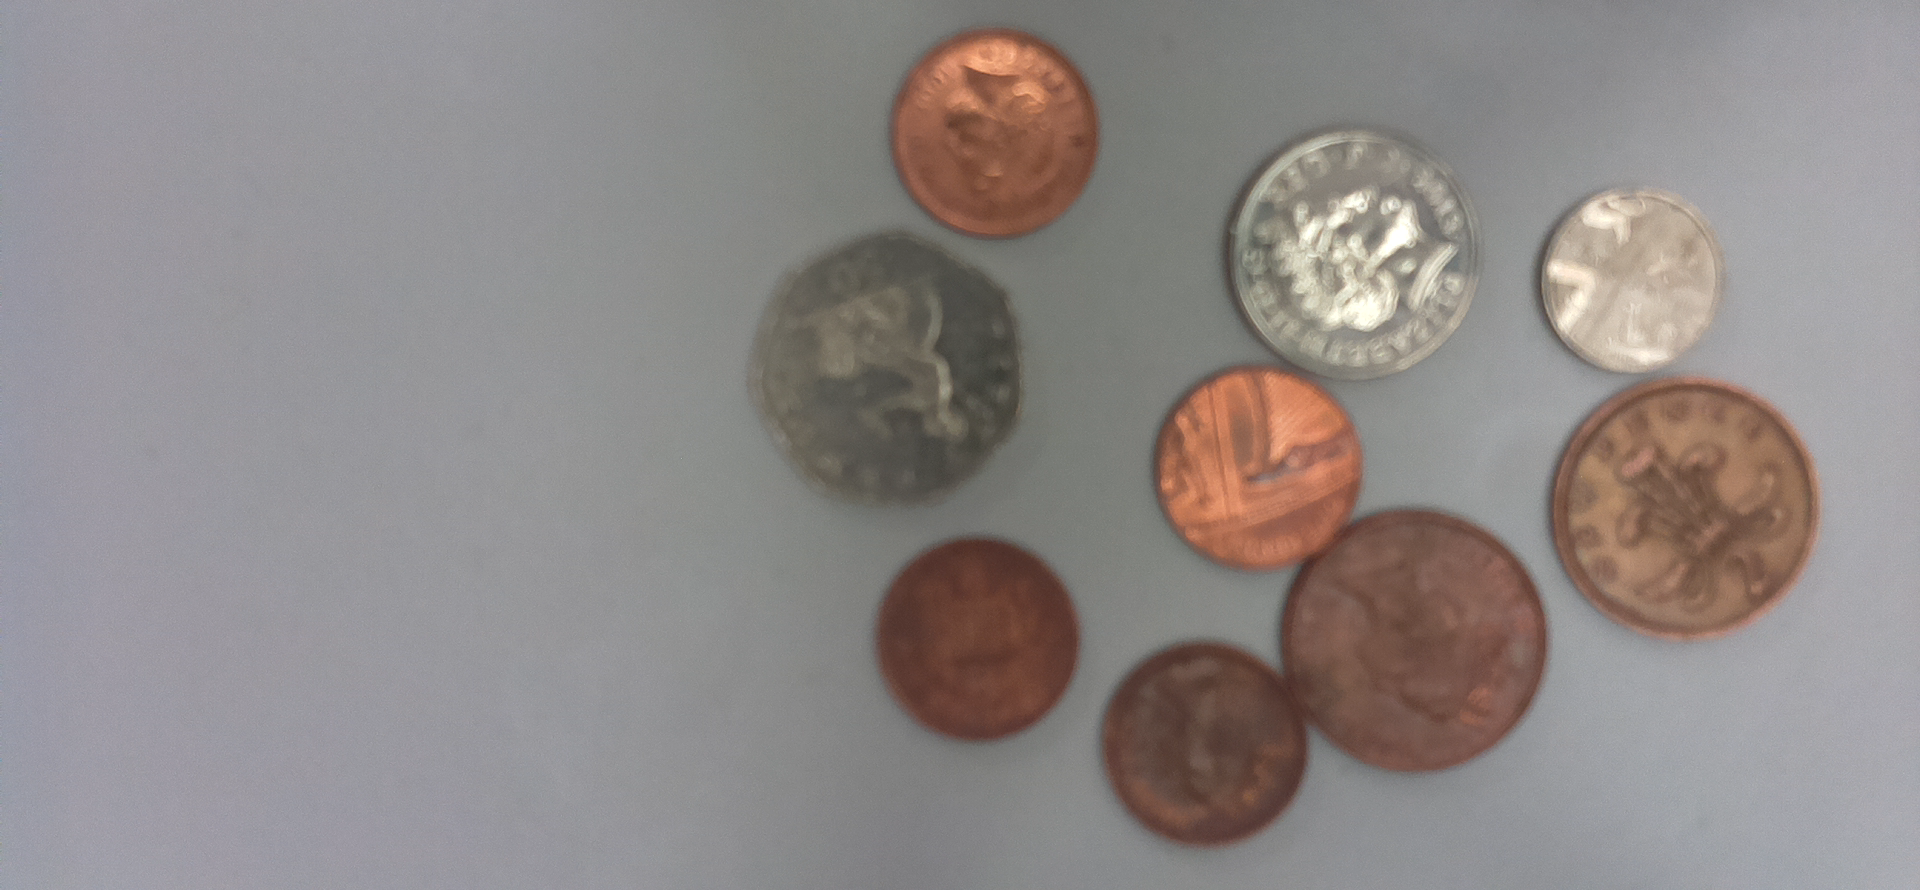

In [1]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("capstone_coins.png", cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread("capstone_coins.png", 1)
img = cv2.GaussianBlur(img, (5,5), 0)
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Hough Circle Transform

In [2]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, param2=27, minRadius=60, maxRadius=120)

In [3]:
circles

array([[[1357.5,  253.5,  112.8],
        [1629.5,  281.5,   88.8],
        [ 994.5,  132.5,  108. ],
        [1203.5,  742.5,  103.1],
        [ 976.5,  638.5,   99.5],
        [1696.5,  500.5,  119.4],
        [1256.5,  467.5,  106.1],
        [1433.5,  642.5,  119.4]]], dtype=float32)

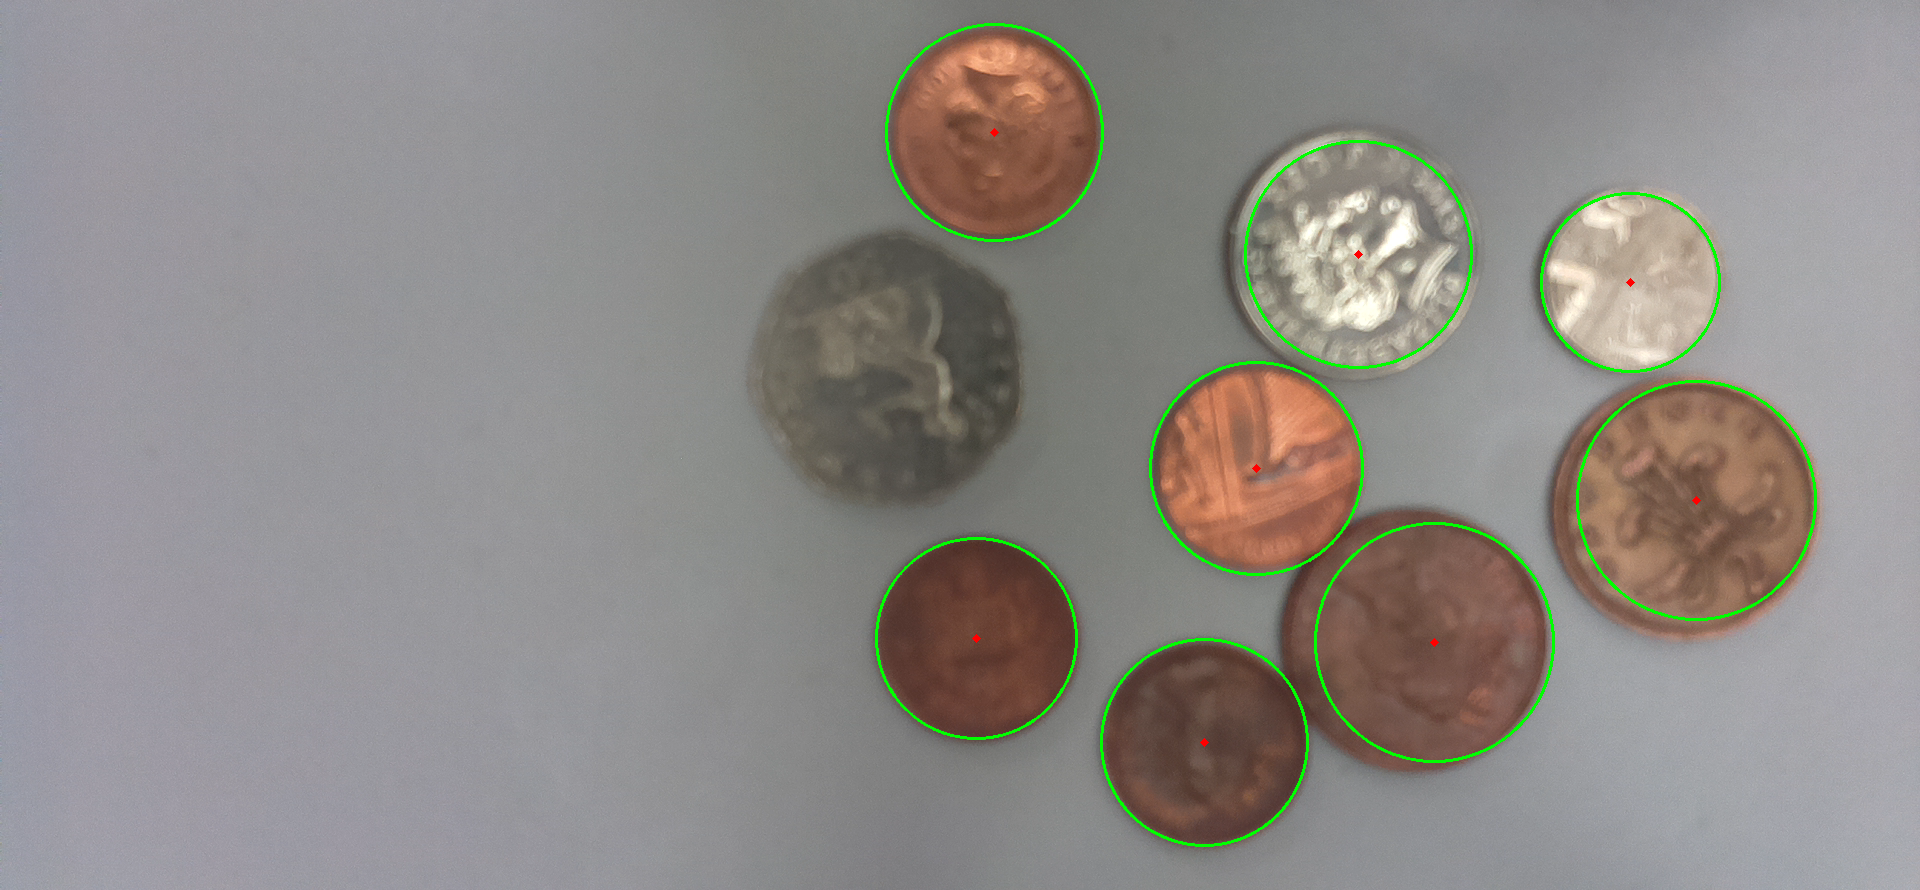

In [4]:
circles = np.uint16(np.around(circles))
count = 1
for i in circles[0, :]:
  # draw the outer circle
  cv2.circle(original_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
  # draw the center of the circle
  cv2.circle(original_image, (i[0], i[1]), 2, (0, 0, 255), 3)
  # cv2.putText(original_image, str(count), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2)
  count += 1

cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Get circle radii

In [5]:
def get_radius(circles):
  radius = []
  for coords in circles[0, :]:
    radius.append(coords[2])
  return radius

In [6]:
radii = get_radius(circles)
print(radii)

[113, 89, 108, 103, 100, 119, 106, 119]


#### Get brightness values

In [7]:
def av_pix(img,circles,size):
    av_value = []
    for coords in circles[0,:]:
        col = np.mean(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
        #print(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
        av_value.append(col)
    return av_value

In [8]:
bright_values = av_pix(img,circles,20)
print(bright_values)

[185.45375, 180.9975, 100.78625, 75.79375, 75.544375, 95.278125, 126.86625, 87.255]


#### Performing coin classification

In [9]:
values = []
for a, b in zip(bright_values, radii):
  if a > 150 and b > 110:
    values.append(10)
  elif a > 150 and b <= 110:
    values.append(5)
  elif a < 150 and b > 110:
    values.append(2)
  elif a < 150 and b < 110:
    values.append(1)

print(values)

[10, 5, 1, 1, 1, 2, 1, 2]


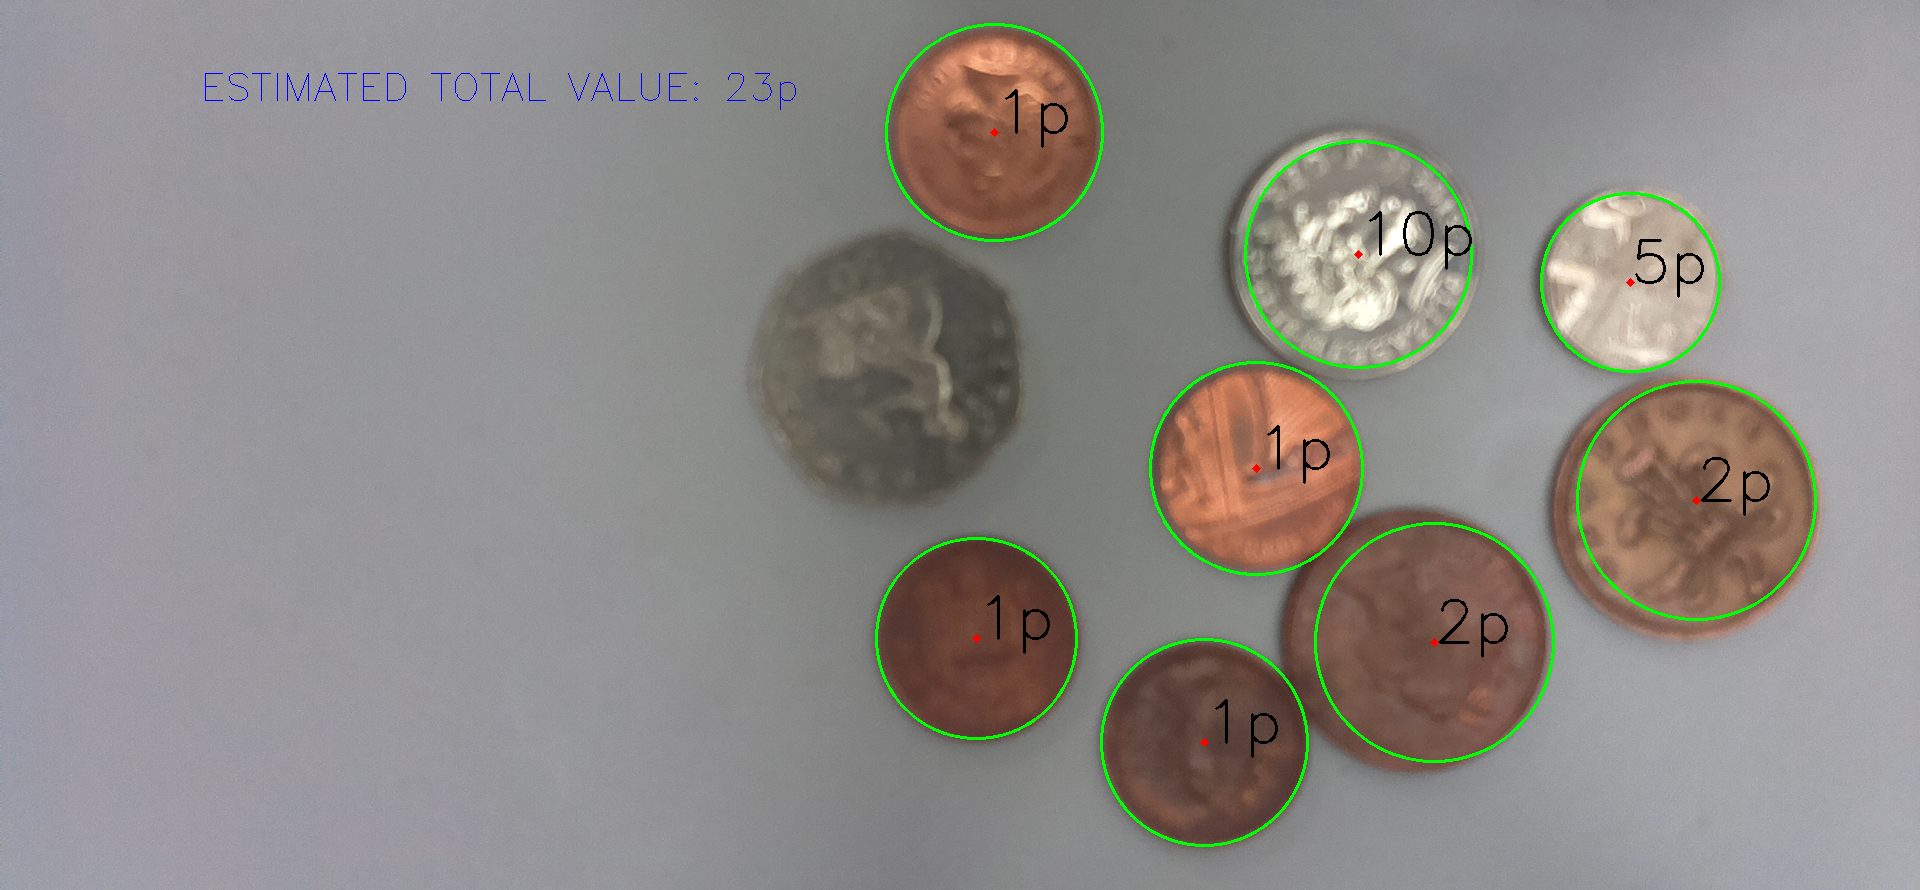

In [10]:
count_2 = 0
for i in circles[0, :]:
  cv2.putText(original_image, str(values[count_2]) + 'p', (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2)
  count_2 += 1
cv2.putText(original_image, 'ESTIMATED TOTAL VALUE: ' + str(sum(values)) + 'p', (200, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255)

cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()